In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from dotenv import load_dotenv
import os

load_dotenv()

%matplotlib inline

In [2]:
DATA_DIR = os.environ.get("DATA_DIR")
data_path = os.path.join(DATA_DIR, "reference_data/rw_data")

In [3]:
prediction_rouge_df = pd.read_csv(os.path.join(data_path, "prediction_rouge_df.csv"))
prediction_bertscore_df = pd.read_csv(os.path.join(data_path, "prediction_bertscore_df.csv"))
prediction_p_reference_df = pd.read_csv(os.path.join(data_path, "prediction_p_reference_df.csv"))
paper_df = pd.read_csv(os.path.join(data_path, "paper_df.csv"))
paper_rw_ref_df = pd.read_csv(os.path.join(data_path, "paper_rw_ref_df.csv"))
ref_df = pd.read_csv(os.path.join(data_path, "ref_df.csv"))

In [4]:
prediction_metric_df = prediction_rouge_df.copy()
for column in prediction_bertscore_df.columns:
    if column not in prediction_metric_df:    
        prediction_metric_df[column] = prediction_bertscore_df[column].copy()
for column in prediction_p_reference_df.columns:
    if column not in prediction_metric_df:    
        prediction_metric_df[column] = prediction_p_reference_df[column].copy()

In [5]:
prediction_metric_df

,model,type,paper_oaid,prediction,rouge.rouge1.precision,rouge.rouge1.recall,rouge.rouge1.fmeasure,rouge.rouge2.precision,rouge.rouge2.recall,rouge.rouge2.fmeasure,...,rouge.rougeL.fmeasure,bertscore.precision,bertscore.recall,bertscore.f1,bertscore.hashcode,p_reference.p_tp_p,p_reference.p_tp_t,p_reference.p_pfp_fp,p_reference.n_p,p_reference.n_t
0,llama-3.1-instruct:8B,sentence,W4402916116,"Our work builds upon the geometric methods, bu...",0.172414,0.131579,0.149254,0.000000,0.000000,0.000000,...,0.119403,0.868477,0.863492,0.865978,r,0.333333,1.000000,1.0,3.0,1.0
1,llama-3.1-instruct:8B,sentence,W4402904225,"Our method, SPWB, builds upon the concepts of ...",0.125000,0.240000,0.164384,0.000000,0.000000,0.000000,...,0.082192,0.848312,0.848016,0.848164,r,0.500000,1.000000,1.0,2.0,1.0
2,llama-3.1-instruct:8B,sentence,W4394971435,While previous neural network based approaches...,0.079365,0.192308,0.112360,0.000000,0.000000,0.000000,...,0.089888,0.834857,0.844332,0.839568,r,0.166667,1.000000,1.0,6.0,1.0
3,llama-3.1-instruct:8B,sentence,W4402916146,While various feature fusion methods have been...,0.122807,0.318182,0.177215,0.053571,0.142857,0.077922,...,0.151899,0.835061,0.861258,0.847957,r,0.200000,1.000000,1.0,5.0,1.0
4,llama-3.1-instruct:8B,sentence,W4402916371,Existing research has shown that techniques li...,0.134615,0.241379,0.172840,0.000000,0.000000,0.000000,...,0.123457,0.837496,0.849858,0.843631,r,0.200000,1.000000,1.0,5.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3618,lexrank,entire,W4402727331,"Furthermore, we design a simple evaluation met...",0.334068,0.512690,0.404539,0.073951,0.113559,0.089572,...,0.145527,0.835203,0.832052,0.833624,r,1.000000,0.551724,NaN,16.0,29.0
3619,lexrank,entire,W4402773128,Unsupervised anomaly detection aims to identif...,0.249242,0.642578,0.359170,0.067475,0.174168,0.097268,...,0.112445,0.828777,0.816052,0.822365,r,1.000000,0.685714,NaN,24.0,35.0
3620,lexrank,entire,W4402716109,"In this work, we propose DiffPure that uses d...",0.259912,0.508621,0.344023,0.061765,0.121037,0.081792,...,0.126336,0.832422,0.836725,0.834568,r,1.000000,0.619048,NaN,13.0,21.0
3621,lexrank,entire,W4402916831,In this work we propose a new conceptualizati...,0.623984,0.241163,0.347875,0.152749,0.058962,0.085082,...,0.130312,0.829248,0.824542,0.826888,r,1.000000,0.750000,NaN,12.0,16.0


In [6]:
models = prediction_metric_df["model"].unique()

In [7]:
non_metric_columns = ["model", "type", "paper_oaid", "prediction"]

In [8]:
rouge_metric_columns = []
for column in prediction_rouge_df.columns:
    if column not in non_metric_columns:
        rouge_metric_columns.append(column)

In [9]:
def get_mean_value_tables(metric_df:pd.DataFrame):
    non_metric_columns = ["model", "type", "paper_oaid", "prediction"]
    metric_columns = []
    for column in metric_df.columns:
        if column not in non_metric_columns:
            metric_columns.append(column)
    avg_metric_df = metric_df[metric_columns+["type", "model"]].groupby(["type", "model"]).mean()

    split_length = 0
    for column in avg_metric_df.columns:
        column_tuple = tuple(column.split("."))
        avg_metric_df = avg_metric_df.rename(columns={column: column_tuple})
        split_length = len(column_tuple)
    avg_metric_df.columns = pd.MultiIndex.from_tuples(avg_metric_df.columns, names=[""]*split_length)

    return avg_metric_df

In [41]:
avg_rouge_df = get_mean_value_tables(prediction_rouge_df)

avg_rouge_df

rouge                                \
                                    rouge1                        rouge2   
                                 precision    recall  fmeasure precision   
type     model                                                             
entire   lexrank                  0.349517  0.430046  0.353030  0.059169   
         llama-3.1-instruct:405B  0.407215  0.449545  0.405111  0.087307   
         llama-3.1-instruct:70B   0.423903  0.425459  0.405371  0.091647   
         llama-3.1-instruct:8B    0.365358  0.441043  0.376404  0.072805   
sentence lexrank                  0.261335  0.217502  0.139741  0.007481   
         llama-3.1-instruct:405B  0.140689  0.321774  0.189154  0.026855   
         llama-3.1-instruct:70B   0.155032  0.318575  0.198433  0.029500   
         llama-3.1-instruct:8B    0.132835  0.266767  0.169105  0.019916   

                                                                          \
                                                        rougeL             
                                    recall  fmeasure precision    recall   
type     model                                                             
entire   lexrank                  0.073655  0.060041  0.131693  0.154700   
         llama-3.1-instruct:405B  0.095687  0.086618  0.143336  0.163008   
         llama-3.1-instruct:70B   0.090416  0.086981  0.152338  0.157714   
         llama-3.1-instruct:8B    0.087840  0.074967  0.131508  0.163636   
sentence lexrank                  0.015862  0.009001  0.222681  0.141564   
         llama-3.1-instruct:405B  0.063516  0.036399  0.092661  0.216320   
         llama-3.1-instruct:70B   0.063133  0.038110  0.104608  0.218545   
         llama-3.1-instruct:8B    0.042746  0.025822  0.087986  0.178857   

                                            
                                            
                                  fmeasure  
type     model                              
entire   lexrank                  0.127701  
         llama-3.1-instruct:405B  0.143793  
         llama-3.1-instruct:70B   0.146902  
         llama-3.1-instruct:8B    0.136493  
sentence lexrank                  0.094973  
         llama-3.1-instruct:405B  0.125252  
         llama-3.1-instruct:70B   0.134373  
         llama-3.1-instruct:8B    0.112461

In [52]:
avg_rouge_df = get_mean_value_tables(prediction_rouge_df)

#avg_rouge_df = avg_rouge_df.round(decimals=3)

avg_rouge_df = avg_rouge_df[[("rouge", "rouge1", "fmeasure"), ("rouge", "rouge2", "fmeasure"), ("rouge", "rougeL", "fmeasure")]]
avg_rouge_df = avg_rouge_df*100
avg_rouge_df.columns = ["ROUGE1", "ROUGE2", "ROUGEL"]
avg_rouge_df.index.names = ["Task", "Model"]
avg_rouge_df = avg_rouge_df.rename(index={
    "lexrank": "LexRank",
    "llama-3.1-instruct:8B": "Llama 3.1 - 8B",
    "llama-3.1-instruct:70B": "Llama 3.1 - 70B",
    "llama-3.1-instruct:405B": "Llama 3.1 - 405B"
})
#avg_rouge_df = avg_rouge_df.reset_index()

avg_rouge_df.to_latex(os.path.join(data_path, "rw_rouge_results.tex"), float_format="%.2f", index=True, multicolumn_format="l")

avg_rouge_df

ROUGE1    ROUGE2     ROUGEL
Task     Model                                           
entire   LexRank           35.302953  6.004065  12.770104
         Llama 3.1 - 405B  40.511083  8.661777  14.379318
         Llama 3.1 - 70B   40.537074  8.698110  14.690156
         Llama 3.1 - 8B    37.640404  7.496706  13.649280
sentence LexRank           13.974115  0.900103   9.497341
         Llama 3.1 - 405B  18.915351  3.639854  12.525228
         Llama 3.1 - 70B   19.843258  3.810996  13.437305
         Llama 3.1 - 8B    16.910522  2.582241  11.246116

In [51]:
avg_bertscore_df = get_mean_value_tables(prediction_bertscore_df)

avg_bertscore_df = avg_bertscore_df[[("bertscore", "f1")]]
avg_bertscore_df = avg_bertscore_df*100
avg_bertscore_df.columns = ["BERTScore"]
avg_bertscore_df.index.names = ["Task", "Model"]
avg_bertscore_df = avg_bertscore_df.rename(index={
    "lexrank": "LexRank",
    "llama-3.1-instruct:8B": "Llama 3.1 - 8B",
    "llama-3.1-instruct:70B": "Llama 3.1 - 70B",
    "llama-3.1-instruct:405B": "Llama 3.1 - 405B"
})

avg_bertscore_df.to_latex(os.path.join(data_path, "rw_bertscore_results.tex"), float_format="%.2f", index=True, multicolumn_format="l")

avg_bertscore_df

BERTScore
Task     Model                      
entire   LexRank           82.788705
         Llama 3.1 - 405B  84.671237
         Llama 3.1 - 70B   84.550939
         Llama 3.1 - 8B    83.864768
sentence LexRank           83.602293
         Llama 3.1 - 405B  85.666440
         Llama 3.1 - 70B   85.817491
         Llama 3.1 - 8B    85.255016

In [57]:
avg_p_reference_df = get_mean_value_tables(prediction_p_reference_df)

avg_p_reference_df = avg_p_reference_df[[("p_reference", "p_tp_p"), ("p_reference", "p_tp_t"), ("p_reference", "p_pfp_fp")]]
avg_p_reference_df = avg_p_reference_df*100
avg_p_reference_df.columns = ["ref_precision", "ref_recall", "ref_prev"]
avg_p_reference_df.index.names = ["Task", "Model"]
avg_p_reference_df = avg_p_reference_df.rename(index={
    "lexrank": "LexRank",
    "llama-3.1-instruct:8B": "Llama 3.1 - 8B",
    "llama-3.1-instruct:70B": "Llama 3.1 - 70B",
    "llama-3.1-instruct:405B": "Llama 3.1 - 405B"
})
avg_p_reference_df["ref_f1"] = 2*avg_p_reference_df["ref_precision"]*avg_p_reference_df["ref_recall"] / (avg_p_reference_df["ref_precision"] + avg_p_reference_df["ref_recall"])

avg_p_reference_df.to_latex(os.path.join(data_path, "rw_p_reference_results.tex"), float_format="%.2f", index=True, multicolumn_format="l")

avg_p_reference_df

ref_precision  ref_recall   ref_prev     ref_f1
Task     Model                                                            
entire   LexRank               99.505439   65.672661   0.000000  79.124133
         Llama 3.1 - 405B      97.707299   75.427652   0.000000  85.133962
         Llama 3.1 - 70B       97.650830   62.309025   0.000000  76.075688
         Llama 3.1 - 8B        89.906733   38.937309   0.000000  54.340522
sentence LexRank               99.441964   85.997088   0.000000  92.232130
         Llama 3.1 - 405B      84.580642   96.517905  78.799020  90.155846
         Llama 3.1 - 70B       86.953362   97.105494  62.755270  91.749447
         Llama 3.1 - 8B        64.741774   72.475013  54.441347  68.390479

In [ ]:
avg_metric_df = pd.concat([avg_rouge_df, avg_bertscore_df, avg_p_reference_df], axis=1)

avg_metric_df = avg_metric_df[["ROUGEL", "BERTScore", "ref_f1", "ref_prev"]]

avg_metric_df

ROUGEL  BERTScore  ref_precision  ref_recall  \
Task     Model                                                               
entire   LexRank           12.770104  82.788705      99.505439   65.672661   
         Llama 3.1 - 405B  14.379318  84.671237      97.707299   75.427652   
         Llama 3.1 - 70B   14.690156  84.550939      97.650830   62.309025   
         Llama 3.1 - 8B    13.649280  83.864768      89.906733   38.937309   
sentence LexRank            9.497341  83.602293      99.441964   85.997088   
         Llama 3.1 - 405B  12.525228  85.666440      84.580642   96.517905   
         Llama 3.1 - 70B   13.437305  85.817491      86.953362   97.105494   
         Llama 3.1 - 8B    11.246116  85.255016      64.741774   72.475013   

                            ref_prev  
Task     Model                        
entire   LexRank            0.000000  
         Llama 3.1 - 405B   0.000000  
         Llama 3.1 - 70B    0.000000  
         Llama 3.1 - 8B     0.000000  
sentence LexRank            0.000000  
         Llama 3.1 - 405B  78.799020  
         Llama 3.1 - 70B   62.755270  
         Llama 3.1 - 8B    54.441347

In [14]:
avg_prediction_rouge_df = prediction_rouge_df[rouge_metric_columns+["type", "model"]].groupby(["type", "model"]).mean()

for column in avg_prediction_rouge_df.columns:
    avg_prediction_rouge_df = avg_prediction_rouge_df.rename(columns={column: tuple(column.split(".")[1:])})
avg_prediction_rouge_df.columns = pd.MultiIndex.from_tuples(avg_prediction_rouge_df.columns, names=["", ""])

for column in avg_prediction_rouge_df.columns:
    print(column)
    avg_prediction_rouge_df = avg_prediction_rouge_df.rename(columns={column: (column[0].replace("rouge", "Rouge "), column[1])})

avg_prediction_rouge_df

('rouge1', 'precision')
('rouge1', 'recall')
('rouge1', 'fmeasure')
('rouge2', 'precision')
('rouge2', 'recall')
('rouge2', 'fmeasure')
('rougeL', 'precision')
('rougeL', 'recall')
('rougeL', 'fmeasure')


rouge1                        rouge2  \
                                 precision    recall  fmeasure precision   
type     model                                                             
entire   lexrank                  0.349517  0.430046  0.353030  0.059169   
         llama-3.1-instruct:405B  0.407215  0.449545  0.405111  0.087307   
         llama-3.1-instruct:70B   0.423903  0.425459  0.405371  0.091647   
         llama-3.1-instruct:8B    0.365358  0.441043  0.376404  0.072805   
sentence lexrank                  0.261335  0.217502  0.139741  0.007481   
         llama-3.1-instruct:405B  0.140689  0.321774  0.189154  0.026855   
         llama-3.1-instruct:70B   0.155032  0.318575  0.198433  0.029500   
         llama-3.1-instruct:8B    0.132835  0.266767  0.169105  0.019916   

                                                        rougeL            \
                                    recall  fmeasure precision    recall   
type     model                                                             
entire   lexrank                  0.073655  0.060041  0.131693  0.154700   
         llama-3.1-instruct:405B  0.095687  0.086618  0.143336  0.163008   
         llama-3.1-instruct:70B   0.090416  0.086981  0.152338  0.157714   
         llama-3.1-instruct:8B    0.087840  0.074967  0.131508  0.163636   
sentence lexrank                  0.015862  0.009001  0.222681  0.141564   
         llama-3.1-instruct:405B  0.063516  0.036399  0.092661  0.216320   
         llama-3.1-instruct:70B   0.063133  0.038110  0.104608  0.218545   
         llama-3.1-instruct:8B    0.042746  0.025822  0.087986  0.178857   

                                            
                                  fmeasure  
type     model                              
entire   lexrank                  0.127701  
         llama-3.1-instruct:405B  0.143793  
         llama-3.1-instruct:70B   0.146902  
         llama-3.1-instruct:8B    0.136493  
sentence lexrank                  0.094973  
         llama-3.1-instruct:405B  0.125252  
         llama-3.1-instruct:70B   0.134373  
         llama-3.1-instruct:8B    0.112461

In [40]:
bertscore_metric_columns = []
for column in prediction_bertscore_df.columns:
    if column not in non_metric_columns:
        bertscore_metric_columns.append(column)

In [39]:
prediction_bertscore_df.drop(columns=["bertscore.hashcode"], inplace=True)

In [41]:
avg_prediction_bertscore_df = prediction_bertscore_df[bertscore_metric_columns+["type", "model"]].groupby(["type", "model"]).mean()

avg_prediction_bertscore_df

bertscore.precision  bertscore.recall  \
type     model                                                            
entire   lexrank                             0.829422          0.826444   
         llama-3.1-instruct:405B             0.848671          0.844839   
         llama-3.1-instruct:70B              0.847886          0.843219   
         llama-3.1-instruct:8B               0.842215          0.835211   
sentence lexrank                             0.838794          0.834060   
         llama-3.1-instruct:405B             0.848489          0.865312   
         llama-3.1-instruct:70B              0.852015          0.864778   
         llama-3.1-instruct:8B               0.847311          0.858144   

                                  bertscore.f1  
type     model                                  
entire   lexrank                      0.827887  
         llama-3.1-instruct:405B      0.846712  
         llama-3.1-instruct:70B       0.845509  
         llama-3.1-instruct:8B        0.838648  
sentence lexrank                      0.836023  
         llama-3.1-instruct:405B      0.856664  
         llama-3.1-instruct:70B       0.858175  
         llama-3.1-instruct:8B        0.852550

In [42]:
p_reference_metric_columns = []
for column in prediction_p_reference_df.columns:
    if column not in non_metric_columns:
        p_reference_metric_columns.append(column)

In [43]:
avg_prediction_p_reference_df = prediction_p_reference_df[p_reference_metric_columns+["type", "model"]].groupby(["type", "model"]).mean()

avg_prediction_p_reference_df

p_reference.p_tp_p  p_reference.p_tp_t  \
type     model                                                             
entire   lexrank                            0.995054            0.656727   
         llama-3.1-instruct:405B            0.977073            0.754277   
         llama-3.1-instruct:70B             0.976508            0.623090   
         llama-3.1-instruct:8B              0.899067            0.389373   
sentence lexrank                            0.994420            0.859971   
         llama-3.1-instruct:405B            0.845806            0.965179   
         llama-3.1-instruct:70B             0.869534            0.971055   
         llama-3.1-instruct:8B              0.647418            0.724750   

                                  p_reference.p_pfp_fp  p_reference.n_p  \
type     model                                                            
entire   lexrank                              0.000000        13.790393   
         llama-3.1-instruct:405B              0.000000        14.608315   
         llama-3.1-instruct:70B               0.000000        11.290393   
         llama-3.1-instruct:8B                0.000000         6.823144   
sentence lexrank                              0.000000         1.620536   
         llama-3.1-instruct:405B              0.787990         2.582589   
         llama-3.1-instruct:70B               0.627553         2.488839   
         llama-3.1-instruct:8B                0.544413         2.662946   

                                  p_reference.n_t  
type     model                                     
entire   lexrank                        13.790393  
         llama-3.1-instruct:405B        14.608315  
         llama-3.1-instruct:70B         11.290393  
         llama-3.1-instruct:8B           6.823144  
sentence lexrank                         1.620536  
         llama-3.1-instruct:405B         2.582589  
         llama-3.1-instruct:70B          2.488839  
         llama-3.1-instruct:8B           2.662946

In [50]:
print(prediction_p_reference_df.loc[(prediction_p_reference_df["model"] == "llama-3.1-instruct:70B") & (prediction_p_reference_df["type"] == "sentence"), "prediction"].values[0])

While recent works have focused on deep models for visual odometry, achieving state-of-the-art performance on datasets such as KITTI, they often rely on large amounts of high-quality ground truth data [7]. In contrast, geometric methods can be more robust and efficient, running at high frame rates while maintaining accuracy, especially when combined with efficient stereo matching and multi-view linking schemes.


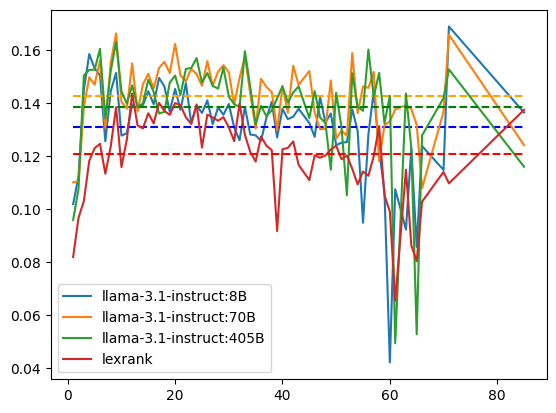

In [113]:
# Add number of references per paper
paper_ref_counts = paper_rw_ref_df[["paper_oaid", "ref_oaid"]].groupby("paper_oaid").count().reset_index().rename(columns={"ref_oaid": "ref_count"})

for model in models:
    prediction_rouge_df_model:pd.DataFrame = prediction_rouge_df[(prediction_rouge_df["model"] == model) & (prediction_rouge_df["type"] == "entire")]
    #print(prediction_rouge_df_model["paper_oaid"].dtype)
    prediction_rouge_df_model = prediction_rouge_df_model.merge(paper_ref_counts, on="paper_oaid", how="inner")
    #print(prediction_rouge_df_model)
    avg_prediction_rouge_df_model = prediction_rouge_df_model[rouge_metric_columns+["ref_count"]].groupby("ref_count").mean().sort_index()
    plt.plot(avg_prediction_rouge_df_model["rouge.rougeL.fmeasure"], label=model)
    plt.hlines([avg_prediction_rouge_df_model["rouge.rougeL.fmeasure"].mean()], [avg_prediction_rouge_df_model.index.min()], [avg_prediction_rouge_df_model.index.max()], linestyles="--", colors=colors[model])
plt.legend()

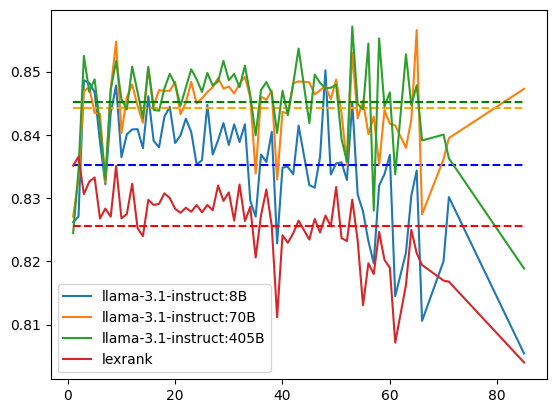

In [104]:
# Add number of references per paper
paper_ref_counts = paper_rw_ref_df[["paper_oaid", "ref_oaid"]].groupby("paper_oaid").count().reset_index().rename(columns={"ref_oaid": "ref_count"})

colors = {
    models[0]: "blue",
    models[1]: "orange",
    models[2]: "green",
    models[3]: "red"
}

for model in models:
    prediction_bertscore_df_model:pd.DataFrame = prediction_bertscore_df[(prediction_bertscore_df["model"] == model) & (prediction_bertscore_df["type"] == "entire")]
    #print(prediction_rouge_df_model["paper_oaid"].dtype)
    prediction_bertscore_df_model = prediction_bertscore_df_model.merge(paper_ref_counts, on="paper_oaid", how="inner")
    #print(prediction_rouge_df_model)
    avg_prediction_bertscore_df_model = prediction_bertscore_df_model[bertscore_metric_columns+["ref_count"]].groupby("ref_count").mean().sort_index()
    plt.plot(avg_prediction_bertscore_df_model["bertscore.f1"], label=model)
    plt.hlines([avg_prediction_bertscore_df_model["bertscore.f1"].mean()], [avg_prediction_bertscore_df_model.index.min()], [avg_prediction_bertscore_df_model.index.max()], linestyles="--", colors=colors[model])
plt.legend()

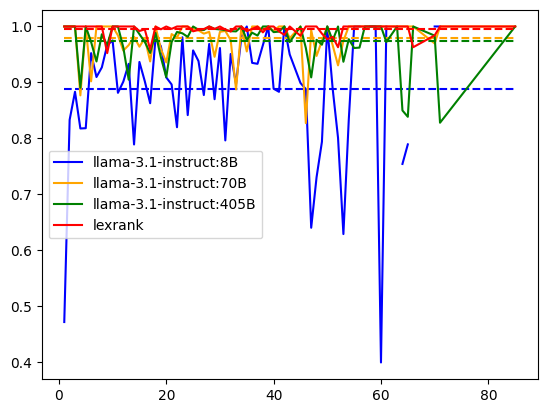

In [103]:
# Add number of references per paper
paper_ref_counts = paper_rw_ref_df[["paper_oaid", "ref_oaid"]].groupby("paper_oaid").count().reset_index().rename(columns={"ref_oaid": "ref_count"})

colors = {
    models[0]: "blue",
    models[1]: "orange",
    models[2]: "green",
    models[3]: "red"
}

for model in models:
    prediction_p_reference_df_model:pd.DataFrame = prediction_p_reference_df[(prediction_p_reference_df["model"] == model) & (prediction_p_reference_df["type"] == "entire")]
    #print(prediction_rouge_df_model["paper_oaid"].dtype)
    prediction_p_reference_df_model = prediction_p_reference_df_model.merge(paper_ref_counts, on="paper_oaid", how="inner")
    #print(prediction_rouge_df_model)
    avg_prediction_p_reference_df_model = prediction_p_reference_df_model[p_reference_metric_columns+["ref_count"]].groupby("ref_count").mean().sort_index()
    plt.plot(avg_prediction_p_reference_df_model["p_reference.p_tp_p"], label=model, color=colors[model])
    plt.hlines([avg_prediction_p_reference_df_model["p_reference.p_tp_p"].mean()], [avg_prediction_p_reference_df_model.index.min()], [avg_prediction_p_reference_df_model.index.max()], linestyles="--", colors=colors[model])
plt.legend()